In [12]:
import pickle

with open("small_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("small_graph.pkl", "rb") as f:
    small_G = pickle.load(f)

In [13]:
# Simulate answers to qustions from user
quiz_answers = {
    # Shy
    "BAP2": "Strongly Agree",
    # Intellectual
    "BAP7": "Strongly Agree",
    # Strict
    "BAP8": "Strongly Agree",
    # Worldly
    "BAP11": "Disagree"
}

In [14]:
import numpy as np

def calculate_user_vector(quiz_answers, model):
    user_vector = np.zeros(model.vector_size)
    for axis, answer in quiz_answers.items():
        node = f"A:{answer}:{axis}"
        vec = model.wv[node]
        user_vector += vec
    user_vector /= len(quiz_answers)
    return user_vector

calculate_user_vector(quiz_answers, model)


array([ 0.24797194, -0.18323508,  0.02297507,  0.24308512,  0.39073861,
        0.00846708,  0.34318927,  0.04427153, -0.39553084,  0.19265651,
       -0.44893638, -0.21621353, -0.22803657, -0.25557726, -0.0124279 ,
        0.20522007, -0.06809231, -0.54350012, -0.02361434,  0.72315912,
        0.13107917,  0.21968401,  0.22891454, -0.12407325, -0.18233526,
        0.42032945, -0.17590957,  0.00112709,  0.02763732,  0.06141719,
       -0.10586408, -0.28807387, -0.17654662, -0.13989624, -0.16162165,
        0.11489922, -0.02155537,  0.02856062,  0.02047579, -0.06042055,
        0.18162791, -0.04460825,  0.06966745, -0.00196935,  0.28627142,
       -0.1260188 ,  0.07305536, -0.0699246 ,  0.22557119, -0.03892261,
        0.36233786,  0.28543516, -0.25038059,  0.06694557, -0.13002393,
        0.07699146,  0.13437526, -0.14218458, -0.28661347,  0.10437353,
       -0.23321109,  0.25345959, -0.23811322,  0.03980695])

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_character_similarities(user_vector, model, small_G):
    character_nodes = [n for n in small_G.nodes if n.startswith("C:")]
    characters = [(n, model.wv[n]) for n in character_nodes]
    character_similarities = {n: cosine_similarity([vec], [user_vector]).flatten()[0] for n, vec in characters}
    return character_similarities

user_vector = calculate_user_vector(quiz_answers, model)
character_similarities = calculate_character_similarities(user_vector, model, small_G)
character_similarities

{'C:Raquel Murillo': 0.17696161944820857,
 'C:Janet': 0.12984280816611596,
 'C:Peter Venkman': 0.3409660779887711,
 'C:Chris Washington': 0.3281225256241751,
 'C:Dean Armitage': 0.16964848690618142,
 'C:Rod Williams': 0.3696902745209998,
 'C:General Hux': 0.3172075053560809,
 'C:Jim': 0.2968809167334872,
 'C:Hera Syndulla': 0.3420115891150418,
 'C:Shin Hati': 0.382119398566387,
 'C:Eric Forman': 0.1992974998690938,
 'C:Danny Vinyard': 0.25546100040977654,
 'C:Azula': 0.34200923628468893,
 'C:Princess Fiona': 0.33101510626398223,
 'C:Nog': 0.3728314002822522,
 'C:Jake Sisko': 0.3070353121592033,
 'C:D.I. Greg Lestrade': 0.21204490518723323,
 'C:Mrs. Hudson': 0.3219278895577864,
 'C:Tony Lip': 0.42550274332941485,
 'C:Jamie Reagan': 0.4362486927646749,
 'C:Regina George': 0.2946644377184482,
 'C:Damian Leigh': 0.33114638533839313,
 'C:Betsy Heron': 0.2485116705979262,
 'C:Luke Dunphy': 0.428451357938755,
 'C:Randall Boggs': 0.21970226371311924,
 'C:Holden Ford': 0.18430204288616894,
 'C:

(array([ 1.,  4.,  1.,  1.,  5.,  3.,  4., 11.,  4., 10., 10., 11., 13.,
        10., 10., 16., 15., 15., 12., 10., 11.,  6.,  6.,  7.,  3.,  4.,
         3.,  0.,  4.,  1.]),
 array([0.05166654, 0.06779065, 0.08391476, 0.10003887, 0.11616298,
        0.13228709, 0.1484112 , 0.16453531, 0.18065942, 0.19678353,
        0.21290764, 0.22903175, 0.24515586, 0.26127997, 0.27740408,
        0.29352819, 0.3096523 , 0.32577641, 0.34190052, 0.35802463,
        0.37414874, 0.39027285, 0.40639695, 0.42252106, 0.43864517,
        0.45476928, 0.47089339, 0.4870175 , 0.50314161, 0.51926572,
        0.53538983]),
 <BarContainer object of 30 artists>)

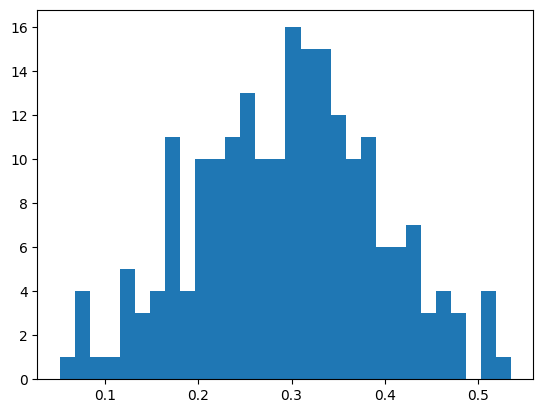

In [16]:
import matplotlib.pyplot as plt

plt.hist(character_similarities.values(), bins=30)


In [17]:
most_similar_characters = dict(sorted(character_similarities.items(), key=lambda item: item[1], reverse=True))
list(most_similar_characters.items())[:10]  # Top 10 most similar characters

[('C:Owen Grady', 0.5353898309525533),
 ('C:Aladdin', 0.5135193443948687),
 ('C:Mazikeen', 0.5107692643909558),
 ('C:Noah Calhoun', 0.5071577294141633),
 ('C:John B', 0.5056065188161766),
 ('C:Asuka Langly Soryu', 0.47684272300526964),
 ('C:Jack Twist', 0.4753545905166464),
 ('C:Nux', 0.4715181702647671),
 ('C:Kristoff', 0.46883791274527364),
 ('C:Miguel', 0.46479750223589666)]

![Asuka Langly Soryu](asuka.jpg)

In [18]:
quiz_answers = {
    # Shy
    "BAP2": "Strongly Agree",
    # Intellectual
    "BAP7": "Strongly Agree",
    # Strict
    "BAP8": "Strongly Agree",
    # Worldly
    "BAP11": "Disagree",
    "BAP28": "Strongly Disagree",
    "BAP60": "Agree",
    "BAP130": "Agree",
    "BAP229": "Strongly Disagree",
    "BAP389": "Strongly Agree",
    "BAP456": "Disagree"
}

Step 1: Kurtosis 0.05402994905456859
Step 2: Kurtosis -0.15555719099176857
Step 3: Kurtosis -0.17557471642950073
Step 4: Kurtosis -0.32359318427783146
Step 5: Kurtosis -0.04554250412510186
Step 6: Kurtosis -0.2313890272968262
Step 7: Kurtosis -0.2840362690980398
Step 8: Kurtosis -0.0935006009265873
Step 9: Kurtosis 0.0098075487367133
Step 10: Kurtosis -0.04458425198284477


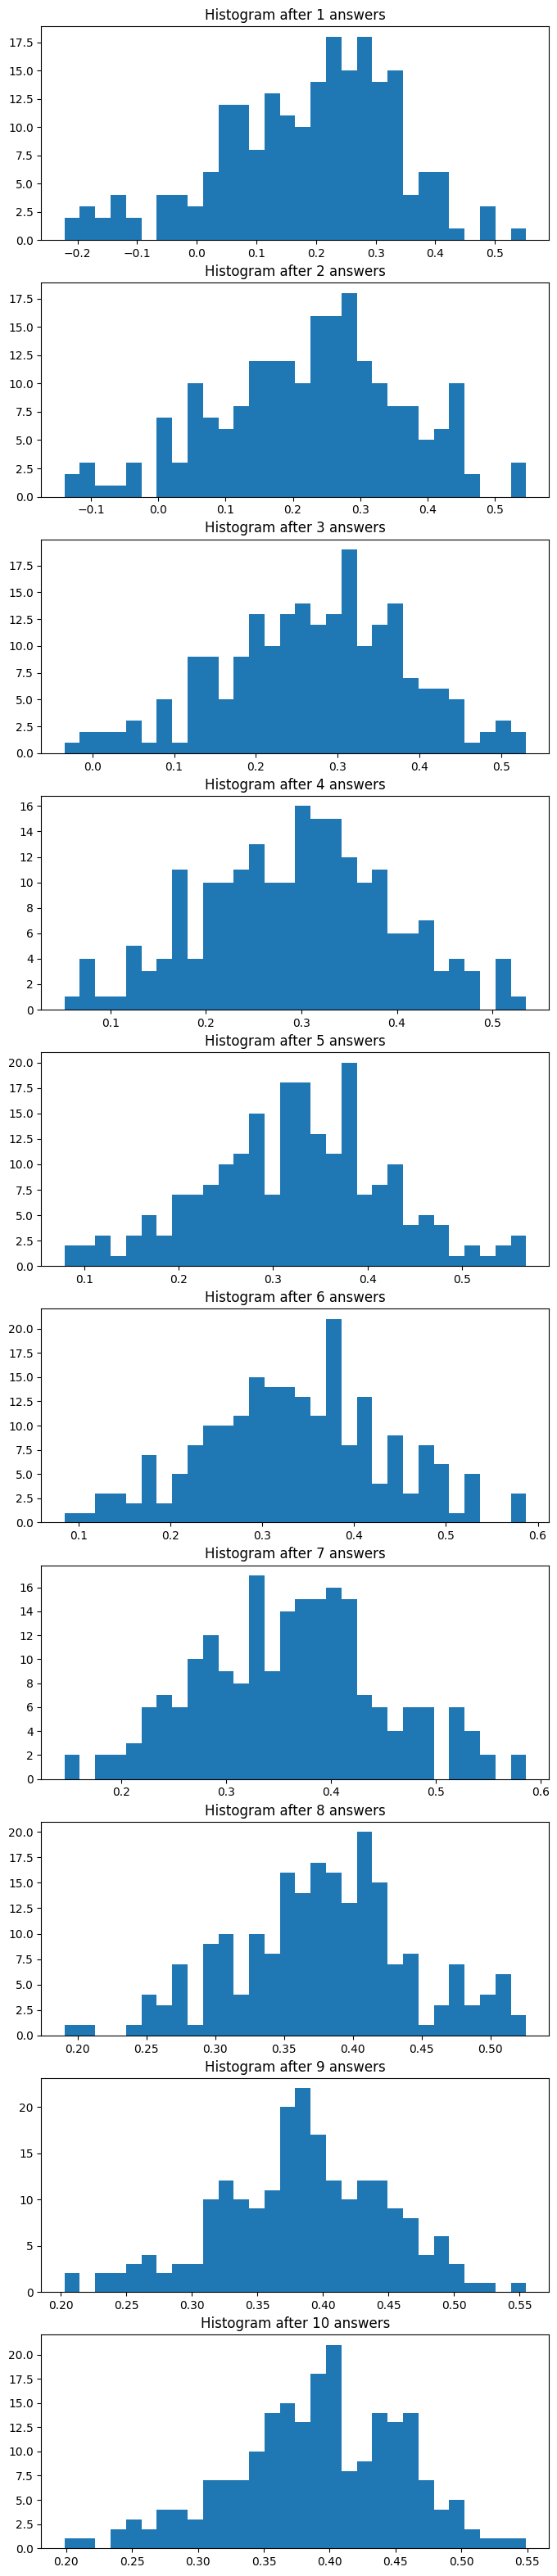

In [19]:
from scipy.stats import kurtosis

fig, axes = plt.subplots(len(quiz_answers), 1, figsize=(8, 4 * len(quiz_answers)))

for i in range(1, len(quiz_answers) + 1):
    subset = dict(list(quiz_answers.items())[:i])
    user_vector = calculate_user_vector(subset, model)
    character_similarities = calculate_character_similarities(user_vector, model, small_G)
    kurt = kurtosis(list(character_similarities.values()))
    print(f"Step {i}: Kurtosis {kurt}")
    axes[i - 1].hist(character_similarities.values(), bins=30)
    axes[i - 1].set_title(f'Histogram after {i} answers')
    